In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [2]:
train=pd.read_csv(r"C:\Users\DEll\Desktop\train_oSwQCTC\train.csv")
test=pd.read_csv(r"C:\Users\DEll\Desktop\test_HujdGe7\test.csv")


In [3]:
print(train.shape)
print(test.shape)

(550068, 12)
(233599, 11)


In [4]:
train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [5]:
train.dtypes

User_ID                         int64
Product_ID                     object
Gender                         object
Age                            object
Occupation                      int64
City_Category                  object
Stay_In_Current_City_Years     object
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
Purchase                        int64
dtype: object

In [6]:
train.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [7]:

def missing_val(df):
    missing_values=df.isnull().sum()
    missing_percentage=missing_values*100/len(df['User_ID'])
    missing_percentage=missing_percentage.sort_values(ascending=False)
    return missing_percentage

In [8]:
missing_val(train)

Product_Category_3            69.672659
Product_Category_2            31.566643
Purchase                       0.000000
Product_Category_1             0.000000
Marital_Status                 0.000000
Stay_In_Current_City_Years     0.000000
City_Category                  0.000000
Occupation                     0.000000
Age                            0.000000
Gender                         0.000000
Product_ID                     0.000000
User_ID                        0.000000
dtype: float64

In [9]:
missing_val(test)

Product_Category_3            69.590195
Product_Category_2            30.969311
Product_Category_1             0.000000
Marital_Status                 0.000000
Stay_In_Current_City_Years     0.000000
City_Category                  0.000000
Occupation                     0.000000
Age                            0.000000
Gender                         0.000000
Product_ID                     0.000000
User_ID                        0.000000
dtype: float64

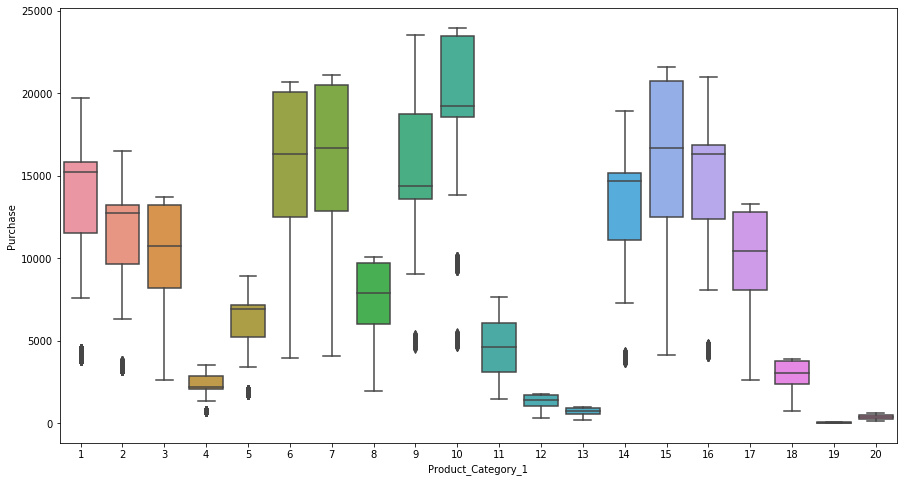

In [10]:
plt.figure(figsize=(15,8))
sns.boxplot(train['Product_Category_1'],train['Purchase'])

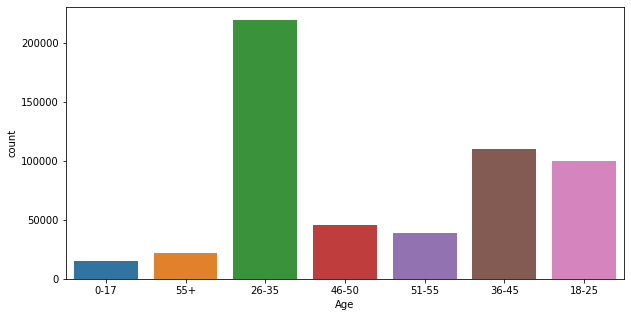

In [11]:
plt.figure(figsize=(10,5))
sns.countplot(train['Age'])

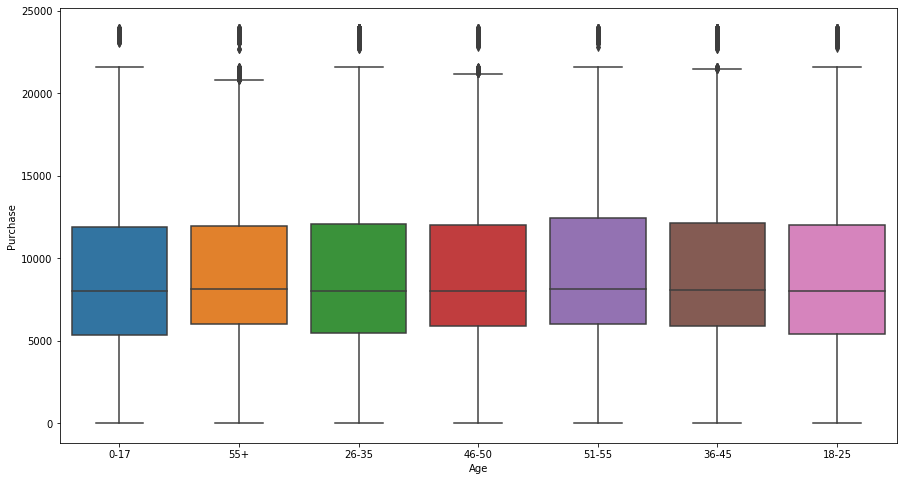

In [12]:
plt.figure(figsize=(15,8))
sns.boxplot(train['Age'],train['Purchase'])

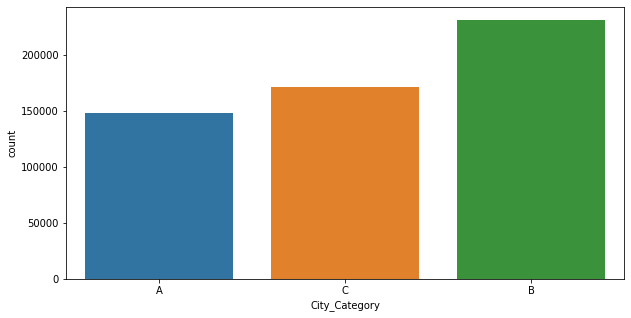

In [13]:
plt.figure(figsize=(10,5))
sns.countplot(train['City_Category'])

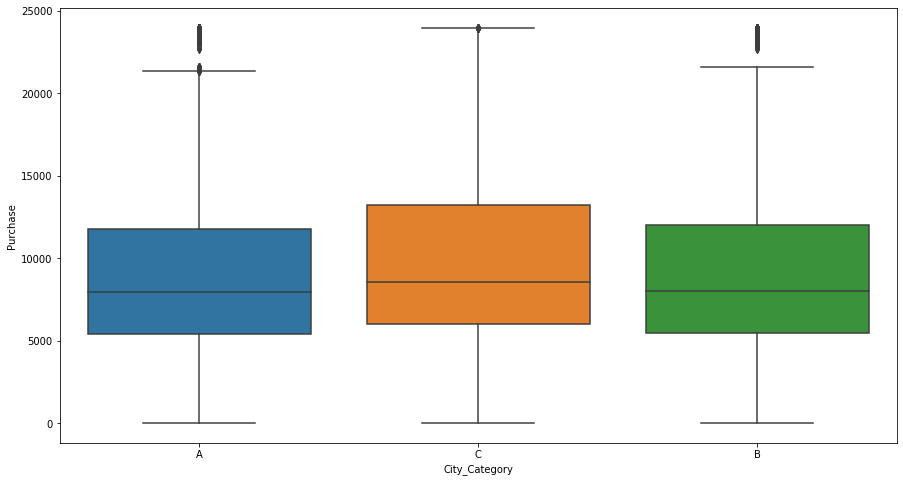

In [14]:
plt.figure(figsize=(15,8))
sns.boxplot(train['City_Category'],train['Purchase'])

# Label Encoding

In [15]:
def label_encoding(df):
    df['Age']=df['Age'].replace('0-17',17)
    df['Age']=df['Age'].replace('18-25',25)
    df['Age']=df['Age'].replace('26-35',35)
    df['Age']=df['Age'].replace('36-45',45)
    df['Age']=df['Age'].replace('46-50',50)
    df['Age']=df['Age'].replace('51-55',55)
    df['Age']=df['Age'].replace('55+',60)
    df['Gender']=df['Gender'].replace('F',0)
    df['Gender']=df['Gender'].replace('M',1)
    df['City_Category']=df['City_Category'].replace('A',0)
    df['City_Category']=df['City_Category'].replace('B',1)
    df['City_Category']=df['City_Category'].replace('C',2)
    df['Stay_In_Current_City_Years']=df['Stay_In_Current_City_Years'].replace('4+',4)
    return df

In [16]:
train=label_encoding(train)
test=label_encoding(test)

In [17]:
train['Stay_In_Current_City_Years']=train['Stay_In_Current_City_Years'].astype(int)
test['Stay_In_Current_City_Years']=test['Stay_In_Current_City_Years'].astype(int)

In [18]:
train.fillna(0,inplace=True)
test.fillna(0,inplace=True)

In [19]:
train.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
dtype: int64

In [20]:
test.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
dtype: int64

In [21]:
dfd=train.copy()
dft=test.copy()

In [22]:
avg_purchase_per_product=pd.DataFrame(train.groupby(['Product_ID'])['Purchase'].mean())
avg_purchase_per_product.reset_index(inplace=True)
avg_purchase_per_user=pd.DataFrame(train.groupby(['User_ID'])['Purchase'].mean())
avg_purchase_per_user.reset_index(inplace=True)

In [23]:
def create_var(data):
    product_count=pd.DataFrame(data['Product_ID'].value_counts())

    product_count.reset_index(inplace=True)
    product_count=product_count.rename(columns={'index':'Product_ID','Product_ID':'Product_count'})

    data['avg_purchase_per_product']=data['Product_ID'].map(avg_purchase_per_product.set_index('Product_ID')['Purchase'])
    data['product_count']=data['Product_ID'].map(product_count.set_index('Product_ID')['Product_count'])
    data['avg_purchase_per_user']=data['User_ID'].map(avg_purchase_per_user.set_index('User_ID')['Purchase'])

    conditions = [
    (data['Product_Category_1'] != 0) & (data['Product_Category_2'] == 0) & (data['Product_Category_3'] == 0),
    (data['Product_Category_1'] != 0) & (data['Product_Category_2'] != 0) & (data['Product_Category_3'] == 0),
    (data['Product_Category_1'] != 0) & (data['Product_Category_2'] != 0) & (data['Product_Category_3'] != 0)]
    choices = [1, 2, 3]
    data['Category_Count'] = np.select(conditions, choices, default=0)
    
    return data

In [24]:
train=create_var(train)
test=create_var(test)

In [25]:
train['Product_ID']=train['Product_ID'].str.slice(2).astype(int)
test['Product_ID']=test['Product_ID'].str.slice(2).astype(int)

In [26]:
train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,avg_purchase_per_product,product_count,avg_purchase_per_user,Category_Count
0,1000001,69042,0,17,10,0,2,0,3,0.0,0.0,8370,11870.863436,227,9545.514286,1
1,1000001,248942,0,17,10,0,2,0,1,6.0,14.0,15200,16304.030981,581,9545.514286,3
2,1000001,87842,0,17,10,0,2,0,12,0.0,0.0,1422,1237.892157,102,9545.514286,1
3,1000001,85442,0,17,10,0,2,0,12,14.0,0.0,1057,1455.140762,341,9545.514286,2
4,1000002,285442,1,60,16,2,4,0,8,0.0,0.0,7969,7692.763547,203,10525.610390,1


In [27]:
test.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,avg_purchase_per_product,product_count,avg_purchase_per_user,Category_Count
0,1000004,128942,1,50,7,1,2,1,1,11.0,0.0,15781.118590,397,14747.714286,2
1,1000009,113442,1,35,17,2,0,0,3,5.0,0.0,11746.665354,117,10243.086207,2
2,1000010,288442,0,45,1,1,4,1,5,14.0,0.0,5731.338028,75,9728.744395,2
3,1000010,145342,0,45,1,1,4,1,4,9.0,0.0,1943.266667,8,9728.744395,2
4,1000011,53842,0,35,1,2,1,0,4,5.0,12.0,2585.590829,214,7957.471429,3


In [28]:
train.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
avg_purchase_per_product      0
product_count                 0
avg_purchase_per_user         0
Category_Count                0
dtype: int64

In [29]:
test.isnull().sum()

User_ID                        0
Product_ID                     0
Gender                         0
Age                            0
Occupation                     0
City_Category                  0
Stay_In_Current_City_Years     0
Marital_Status                 0
Product_Category_1             0
Product_Category_2             0
Product_Category_3             0
avg_purchase_per_product      61
product_count                  0
avg_purchase_per_user          0
Category_Count                 0
dtype: int64

In [30]:
test.fillna(0,inplace=True)

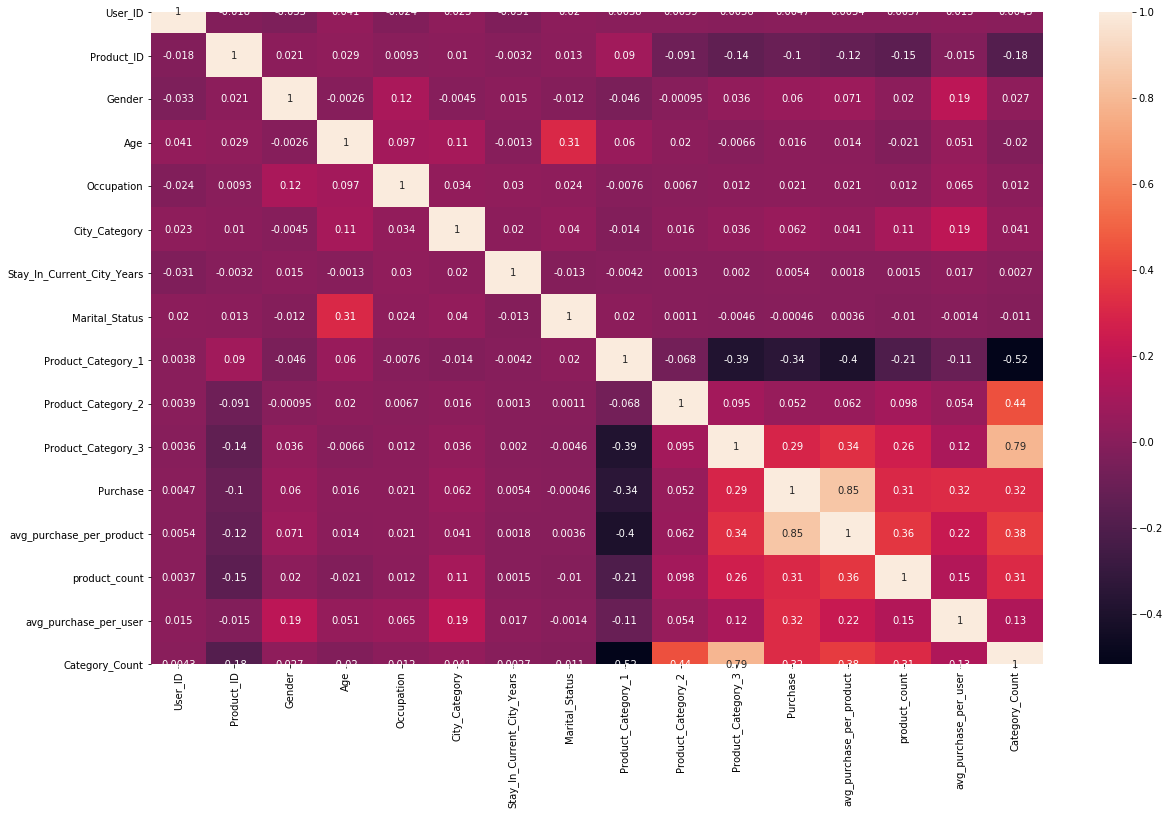

In [31]:
corr=train.corr()
plt.figure(figsize=(20,12))
sns.heatmap(corr,annot=True)

In [32]:
X=train.drop('Purchase',axis=1)

In [33]:
y=train['Purchase']

In [34]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42,shuffle=True)

# Linear Regression

In [35]:
reg=linear_model.LinearRegression()

In [36]:
lm_model=reg.fit(X_train,y_train)

In [37]:
pred=lm_model.predict(X_test)
np.sqrt(mean_squared_error(y_test,pred))

2568.0004496106367

# Decision Tree

In [38]:
DT_reg=DecisionTreeRegressor()

In [39]:
DT_model=DT_reg.fit(X_train,y_train)

In [40]:
pred=DT_model.predict(X_test)

In [41]:
np.sqrt(mean_squared_error(y_test,pred))

3574.134027359714

# Random Forest

In [42]:
RF_reg=RandomForestRegressor()

In [43]:
RF_model=RF_reg.fit(X_train,y_train)

In [44]:
y_pred_rf = RF_reg.predict(X_test)

In [45]:
np.sqrt(mean_squared_error(y_test,pred))

3574.134027359714

# XGBOOST

In [46]:
from xgboost.sklearn import XGBRegressor

In [47]:
xgb=XGBRegressor(n_estimators=500,learning_rate=0.2,gamma=0,min_child_weight=10,
                           subsample=0.8,colsample_bytree=1,max_depth=7)

In [48]:
XGB_model=xgb.fit(X_train,y_train)

In [49]:
pred=XGB_model.predict(X_test)

In [51]:
np.sqrt(mean_squared_error(y_test,pred))

2455.1467598650897

# Submission

In [52]:
purchase=XGB_model.predict(test)

In [53]:
test.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,avg_purchase_per_product,product_count,avg_purchase_per_user,Category_Count
0,1000004,128942,1,50,7,1,2,1,1,11.0,0.0,15781.118590,397,14747.714286,2
1,1000009,113442,1,35,17,2,0,0,3,5.0,0.0,11746.665354,117,10243.086207,2
2,1000010,288442,0,45,1,1,4,1,5,14.0,0.0,5731.338028,75,9728.744395,2
3,1000010,145342,0,45,1,1,4,1,4,9.0,0.0,1943.266667,8,9728.744395,2
4,1000011,53842,0,35,1,2,1,0,4,5.0,12.0,2585.590829,214,7957.471429,3


In [54]:
test1=test[['User_ID','Product_ID']]

In [55]:
test1['Purchase']=purchase

C:\Users\DEll\Anaconda3\envs\mynew\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [56]:
test1.head()

,User_ID,Product_ID,Purchase
0,1000004,128942,14997.552734
1,1000009,113442,10196.596680
2,1000010,288442,7405.304199
3,1000010,145342,3191.023682
4,1000011,53842,2718.885010
